In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def Suscetivel (s, i, beta, b, u) :
    return s * b - (beta*s*i) - s*u
def infectado (s ,i ,beta ,teta ,u ) :
    return ( beta*s*i) - u*i - teta * i
def rk4_si_step (s , i ,beta ,dt ,b , u , teta ) :
    # Calculos para Suscetiveis
    k1_s = dt * Suscetivel (s , i , beta ,b , u )
    k2_s = dt * Suscetivel ( s + 0.5* k1_s , i + 0.5* k1_s ,
    beta ,b , u )
    k3_s = dt * Suscetivel ( s + 0.5* k2_s , i + 0.5* k2_s ,
    beta ,b , u )
    k4_s = dt * Suscetivel ( s + k3_s , i + k3_s , beta ,b , u )
    # Calculos para Infectados
    k1_i = dt * infectado (s , i , beta , teta , u )
    k2_i = dt * infectado ( s + 0.5* k1_i , i + 0.5* k1_i ,
    beta , teta , u )
    k3_i = dt * infectado ( s + 0.5* k2_i , i + 0.5* k2_i ,
    beta, teta, u )
    k4_i = dt * infectado ( s + k3_i , i + k3_i , beta , teta,
    u)
    # Atualizacao de Suscetiveis e Infectados
    s_next = s + ( k1_s + 2* k2_s + 2* k3_s + k4_s ) / 6
    i_next = i + ( k1_i + 2* k2_i + 2* k3_i + k4_i ) / 6
    return s_next , i_next

In [13]:
# Parametros iniciais e de simulacao
N = 1000 # Populacao total
s0 = 999 # Numero inicial de suscetiveis
i0 = 1 # Numero inicial de infectados
beta = 0.3 / N # Taxa de transmissao
dt = 0.5 # Passo de tempo
tf = 60 # Tempo final
b = 0.05 # Fluxo de entrada
u = 0.01 # Fluxo de Saida - tipo 1
teta = 0.0 # Fluxo de Saida - tipo 2

# Listas para armazenar os resultados da simulacao

# Loop de s i m u l a o
dfs = []

for i in range(1,6):
    s , i = s0 , i0
    s_values , i_values , t_values = [ s0 ] , [ i0 ] , [0]
    for t in range (1 , int ( tf / (dt/i)) + 1) :
        s , i = rk4_si_step (s , i , beta , dt/i , b ,u , teta )
        s_values . append ( s )
        i_values . append ( i )
        t_values . append ( t * dt/i )
    df_si = pd . DataFrame ({
        ' Tempo ': t_values ,
        ' Suscetiveis ': s_values ,
        ' Infectados ': i_values
    })
    dfs.append(df_si)
df_si . to_csv ('RK_approx.csv')

In [19]:
dfs

[      Tempo    Suscetiveis    Infectados 
 0        0.0   9.990000e+02      1.000000
 1        0.5   1.017578e+03      1.155879
 2        1.0   1.036453e+03      1.339787
 3        1.5   1.055624e+03      1.557363
 4        2.0   1.075090e+03      1.815490
 ..       ...            ...           ...
 116     58.0   1.819844e-07   1667.998825
 117     58.5   1.445648e-07   1658.552121
 118     59.0   1.150022e-07   1649.165809
 119     59.5   9.161386e-08   1639.839417
 120     60.0   7.308423e-08   1630.572480
 
 [121 rows x 3 columns],
       Tempo    Suscetiveis    Infectados 
 0        0.0   9.990000e+02      1.000000
 1        0.5   1.017578e+03      1.155879
 2        1.0   1.036453e+03      1.339787
 3        1.5   1.055624e+03      1.557363
 4        2.0   1.075090e+03      1.815490
 ..       ...            ...           ...
 116     58.0   1.819844e-07   1667.998825
 117     58.5   1.445648e-07   1658.552121
 118     59.0   1.150022e-07   1649.165809
 119     59.5   9.161386e-0

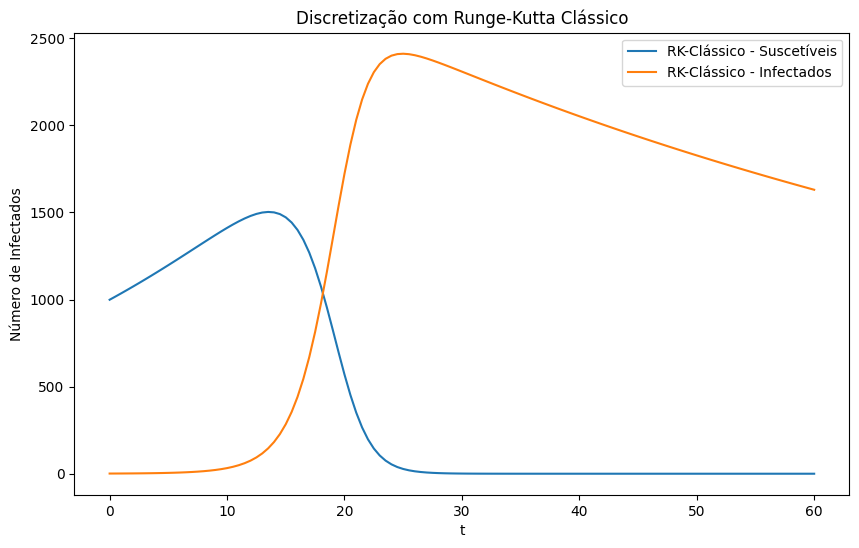

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(t_values, s_values, '-', label='RK-Clássico - Suscetíveis')

plt.plot(t_values, i_values, '-', label='RK-Clássico - Infectados')

plt.xlabel('t')

plt.ylabel('Número de Infectados')
plt.title('Discretização com Runge-Kutta Clássico')
plt.legend()
plt.show()
